# 01. Boston 주택 가격 예측 모델
---

### 데이터셋의 feature에 대한 설명

| feature   | 설명 |
|-----------|------|
| CRIM      | 자치시별 1인당 범죄율 |
| ZN        | 25,000 평방피트를 초과하는 거주지역의 비율 |
| INDUS     | 비소매상업지역이 점유하고 있는 토지의 비율 |
| CHAS      | 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) |
| NOX       | 10ppm 당 농축 일산화질소 |
| RM        | 주택 1 가구당 평균 방의 개수 |
| AGE       | 1940년 이전에 건축된 소유주택의 비율 |
| DIS       | 5개의 보스턴 직업센터까지의 접근성 지수 |
| RAD       | 방사형 도로까지의 접근성 지수 |
| TAX       | 10,000 달러당 재산세율 |
| PTRATIO   | 자치시(town)별 학생/교사 비율 |
| B         | 1000 × (Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율 |
| LSTAT     | 모집단의 하위계층의 비율(%) |
| MEDV      | 본인 소유의 주택가격(중앙값) (단위: $1,000) |

### 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dropout  # Dropout 레이어 import 추가
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

### 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# 간단한 모델부터 시작 (Dropout 없이)
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

print("모델 구성 완료!")

모델 구성 완료!


2025-06-11 16:38:03.273977: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-06-11 16:38:03.273998: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-06-11 16:38:03.274004: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-06-11 16:38:03.274031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-11 16:38:03.274043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 모델 학습

In [5]:

# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
print("모델 학습 시작...")

history = model.fit(train_data, train_labels,
                    epochs=100,  
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

print("모델 학습 완료!")

모델 학습 시작...
Epoch 1/100
 1/11 [=>............................] - ETA: 2s - loss: 647.8162 - mae: 23.3430

2025-06-11 16:38:03.563469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 22ms/step - loss: 562.0113 - mae: 22.0282 - val_loss: 622.9022 - val_mae: 23.4312
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 547.4648 - mae: 21.8378 - val_loss: 610.5292 - val_mae: 23.2255
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 534.1705 - mae: 21.6498 - val_loss: 595.0853 - val_mae: 22.9819
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 519.3847 - mae: 21.4420 - val_loss: 580.0447 - val_mae: 22.7158
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 506.1733 - mae: 21.2167 - val_loss: 565.2669 - val_mae: 22.4276
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 490.9693 - mae: 20.9550 - val_loss: 547.7369 - val_mae: 22.0696
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 476.1090 - mae: 20.6723 - val_loss: 532.2038 - val_mae: 21.6789
Epoch 8/100
11/11 [==============================] -

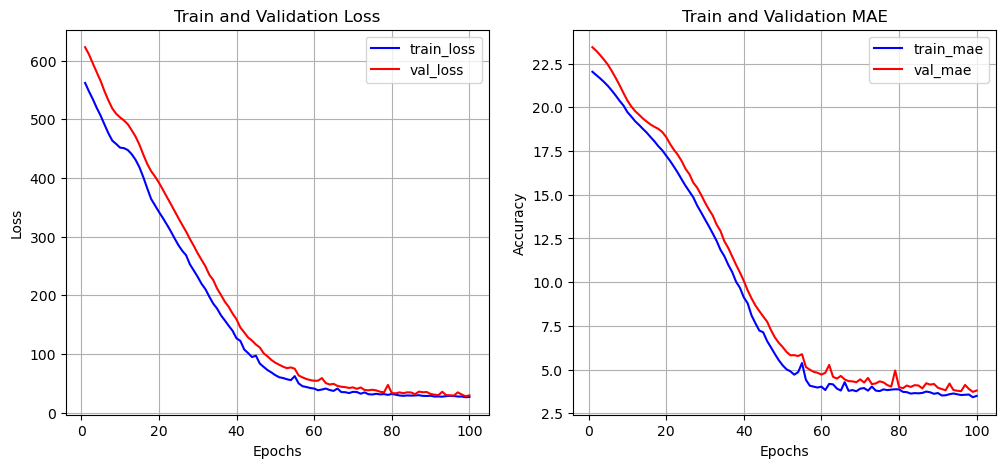

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('default')  # seaborn-white 대신 default 스타일 사용

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### # 모델 예측 평가

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

# 테스트 데이터로 모델 성능 평가
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=0)

print(f"테스트 손실(Test Loss): {test_loss:.4f}")
print(f"테스트 MAE(Test MAE): {test_mae:.4f}")

# 예측값과 실제값 비교
predictions = model.predict(test_data)

# 처음 10개 샘플 비교
print("\n=== 예측값 vs 실제값 비교 (처음 10개) ===")
for i in range(10):
    print(f"예측: ${predictions[i][0]:.1f}K, 실제: ${test_labels[i]:.1f}K, 차이: ${abs(predictions[i][0] - test_labels[i]):.1f}K")


테스트 손실(Test Loss): 21.1938
테스트 MAE(Test MAE): 3.3656
4/4 [==============================] - 0s 56ms/step

=== 예측값 vs 실제값 비교 (처음 10개) ===
예측: $8.5K, 실제: $7.2K, 차이: $1.3K
예측: $22.1K, 실제: $18.8K, 차이: $3.3K
예측: $22.5K, 실제: $19.0K, 차이: $3.5K
예측: $28.5K, 실제: $27.0K, 차이: $1.5K
예측: $26.0K, 실제: $22.2K, 차이: $3.8K
예측: $23.0K, 실제: $24.5K, 차이: $1.5K
예측: $30.1K, 실제: $31.2K, 차이: $1.1K
예측: $25.1K, 실제: $22.9K, 차이: $2.2K
예측: $16.7K, 실제: $20.5K, 차이: $3.8K
예측: $19.8K, 실제: $23.2K, 차이: $3.4K


In [ ]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

# Reuters 데이터셋 로드
from keras.datasets import reuters
from sklearn.model_selection import train_test_split

# 가장 빈번한 10,000개의 단어만 사용
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터에서 25%를 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, 
    test_size=0.25, 
    random_state=42, 
    stratify=train_labels  # 레이블 비율 유지
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))


In [ ]:
# 데이터 구조 확인
print("=== 데이터 구조 확인 ===")
print(f"훈련 데이터 형태: {type(train_data)}")
print(f"첫 번째 뉴스 기사 길이: {len(train_data[0])}")
print(f"첫 번째 뉴스 기사 (처음 10개 단어): {train_data[0][:10]}")
print(f"첫 번째 뉴스 기사 레이블: {train_labels[0]}")

# 각 뉴스 기사의 길이 분포 확인
import numpy as np
lengths = [len(x) for x in train_data]
print(f"\n=== 뉴스 기사 길이 통계 ===")
print(f"평균 길이: {np.mean(lengths):.1f}")
print(f"최소 길이: {np.min(lengths)}")
print(f"최대 길이: {np.max(lengths)}")
print(f"중앙값: {np.median(lengths):.1f}")

# 레이블 분포 확인
unique_labels, counts = np.unique(train_labels, return_counts=True)
print(f"\n=== 레이블 분포 (상위 10개) ===")
sorted_indices = np.argsort(counts)[::-1][:10]
for i in sorted_indices:
    print(f"레이블 {unique_labels[i]}: {counts[i]}개")


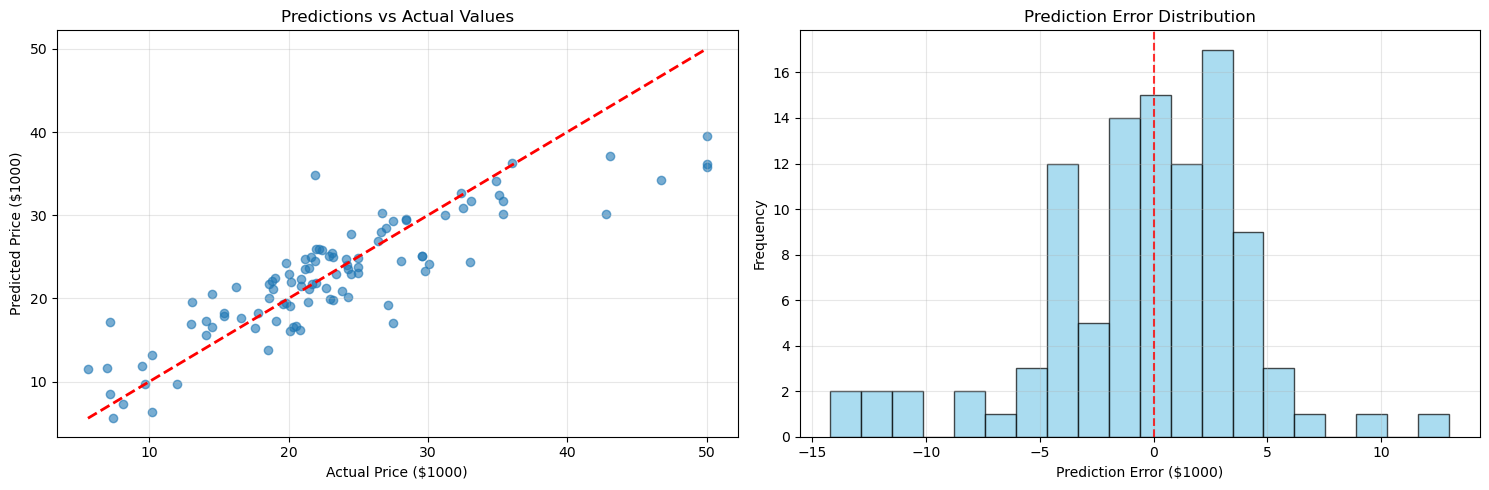


=== 예측 성능 통계 ===
평균 절대 오차: $3.37K
오차 표준편차: $4.58K
최대 오차: $14.19K


In [9]:
# 예측 결과 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. 예측값 vs 실제값 산점도
ax1.scatter(test_labels, predictions, alpha=0.6)
ax1.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price ($1000)')
ax1.set_ylabel('Predicted Price ($1000)')
ax1.set_title('Predictions vs Actual Values')
ax1.grid(True, alpha=0.3)

# 2. 오차 히스토그램
errors = predictions.flatten() - test_labels
ax2.hist(errors, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax2.set_xlabel('Prediction Error ($1000)')
ax2.set_ylabel('Frequency')
ax2.set_title('Prediction Error Distribution')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 통계 정보
print(f"\n=== 예측 성능 통계 ===")
print(f"평균 절대 오차: ${abs(errors).mean():.2f}K")
print(f"오차 표준편차: ${errors.std():.2f}K")
print(f"최대 오차: ${abs(errors).max():.2f}K")


# 02. Reuters 딥러닝 모델
---

### 데이터 로드 및 전처리

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [11]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# Reuters 데이터셋 로드
from keras.datasets import reuters
from sklearn.model_selection import train_test_split

# 가장 빈번한 10,000개의 단어만 사용
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터에서 25%를 검증 데이터로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, 
    test_size=0.25, 
    random_state=42, 
    stratify=train_labels  # 레이블 비율 유지
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))


6736
2246
2246
46


In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    # 원-핫 인코딩 함수 구현
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

### 모델 구성 및 컴파일

In [13]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

# 첫 번째 은닉층 (입력 차원: 10000)
model.add(Dense(512, activation='relu', input_shape=(10000,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 두 번째 은닉층
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 세 번째 은닉층
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 출력층 (46개 클래스 분류)
model.add(Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               5120512   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               5120512   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)              

### 모델 학습

In [15]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백: 최고 성능 모델 저장
checkpoint = ModelCheckpoint('best_model.h5', 
                           monitor='val_accuracy',
                           save_best_only=True,
                           mode='max',
                           verbose=1)

# EarlyStopping 콜백: 조기 종료
early_stopping = EarlyStopping(monitor='val_loss',
                             patience=5,
                             restore_best_weights=True,
                             verbose=1)

# 모델 학습
history = model.fit(x_train, y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data=(x_test, y_test),
                   callbacks=[checkpoint, early_stopping],
                   verbose=1)

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 2.2965 - accuracy: 0.5257
Epoch 1: val_accuracy improved from -inf to 0.69234, saving model to best_model.h5
53/53 [==============================] - 3s 38ms/step - loss: 2.2965 - accuracy: 0.5257 - val_loss: 1.8171 - val_accuracy: 0.6923
Epoch 2/50
 3/53 [>.............................] - ETA: 1s - loss: 1.4278 - accuracy: 0.7161

/Users/kenny/miniforge3/envs/DS4_DL/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/53 [============================>.] - ETA: 0s - loss: 1.3295 - accuracy: 0.7267
Epoch 2: val_accuracy improved from 0.69234 to 0.74399, saving model to best_model.h5
53/53 [==============================] - 1s 24ms/step - loss: 1.3308 - accuracy: 0.7264 - val_loss: 1.6437 - val_accuracy: 0.7440
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 1.0514 - accuracy: 0.7704
Epoch 3: val_accuracy improved from 0.74399 to 0.76848, saving model to best_model.h5
53/53 [==============================] - 1s 24ms/step - loss: 1.0487 - accuracy: 0.7712 - val_loss: 1.3683 - val_accuracy: 0.7685
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.8023 - accuracy: 0.8200
Epoch 4: val_accuracy improved from 0.76848 to 0.77694, saving model to best_model.h5
53/53 [==============================] - 2s 30ms/step - loss: 0.8059 - accuracy: 0.8195 - val_loss: 1.1627 - val_accuracy: 0.7769
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.6704 - accu

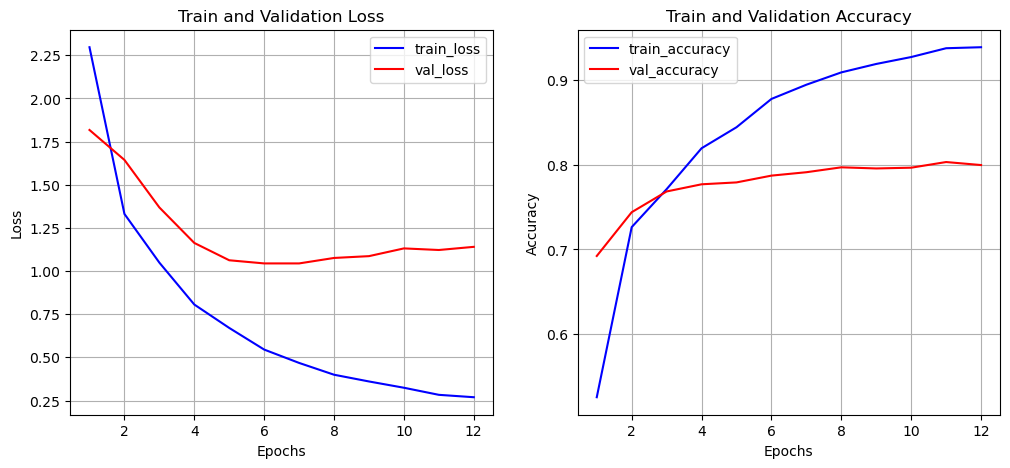

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('default')  # seaborn-white 대신 default 스타일 사용

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [18]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'테스트 손실: {test_loss:.4f}')
print(f'테스트 정확도: {test_accuracy:.4f}')

71/71 [==============================] - 1s 15ms/step - loss: 1.0441 - accuracy: 0.7912
테스트 손실: 1.0441
테스트 정확도: 0.7912


# 03. CIFAR10 딥러닝 모델
---

### 데이터 로드 및 전처리

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [20]:
 # 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 11s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [21]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

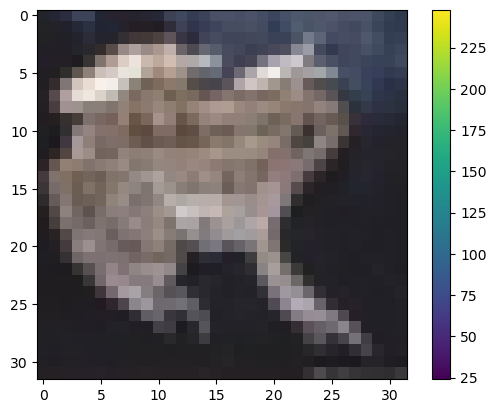

In [23]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('default')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [24]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [26]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일

In [28]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               1573376   
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)              

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               1573376   
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)              

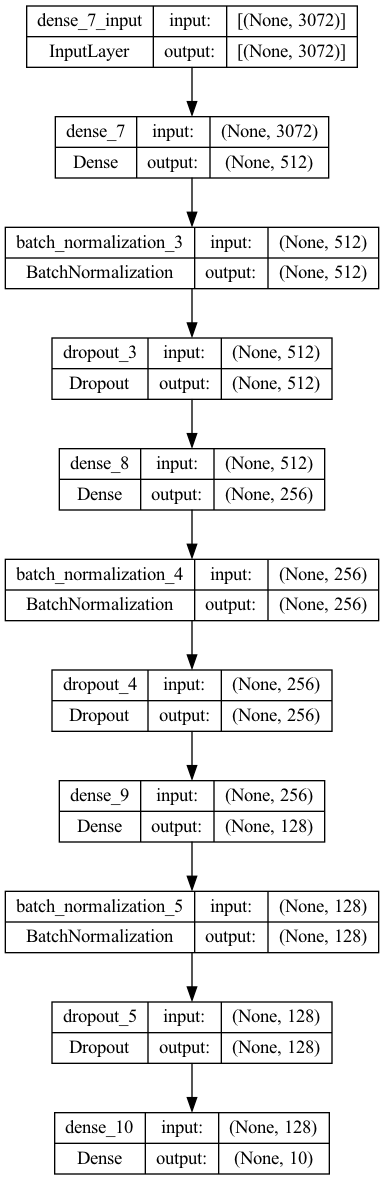

In [30]:
utils.plot_model(model, show_shapes=True)

### 모델 학습

In [33]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 함수 설정
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 2.0473 - accuracy: 0.2846
Epoch 1: val_accuracy improved from -inf to 0.34060, saving model to best_model.h5
313/313 [==============================] - 9s 23ms/step - loss: 2.0473 - accuracy: 0.2846 - val_loss: 1.9034 - val_accuracy: 0.3406
Epoch 2/50
  1/313 [..............................] - ETA: 11s - loss: 1.7658 - accuracy: 0.3281

/Users/kenny/miniforge3/envs/DS4_DL/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/313 [============================>.] - ETA: 0s - loss: 1.9121 - accuracy: 0.3224
Epoch 2: val_accuracy improved from 0.34060 to 0.36300, saving model to best_model.h5
313/313 [==============================] - 5s 16ms/step - loss: 1.9121 - accuracy: 0.3225 - val_loss: 1.8167 - val_accuracy: 0.3630
Epoch 3/50
309/313 [============================>.] - ETA: 0s - loss: 1.8955 - accuracy: 0.3332
Epoch 3: val_accuracy did not improve from 0.36300
313/313 [==============================] - 5s 16ms/step - loss: 1.8953 - accuracy: 0.3331 - val_loss: 1.8232 - val_accuracy: 0.3618
Epoch 4/50
311/313 [============================>.] - ETA: 0s - loss: 1.8820 - accuracy: 0.3381
Epoch 4: val_accuracy did not improve from 0.36300
313/313 [==============================] - 4s 14ms/step - loss: 1.8820 - accuracy: 0.3382 - val_loss: 1.8227 - val_accuracy: 0.3588
Epoch 5/50
313/313 [==============================] - ETA: 0s - loss: 1.8792 - accuracy: 0.3385
Epoch 5: val_accuracy did not improve from 

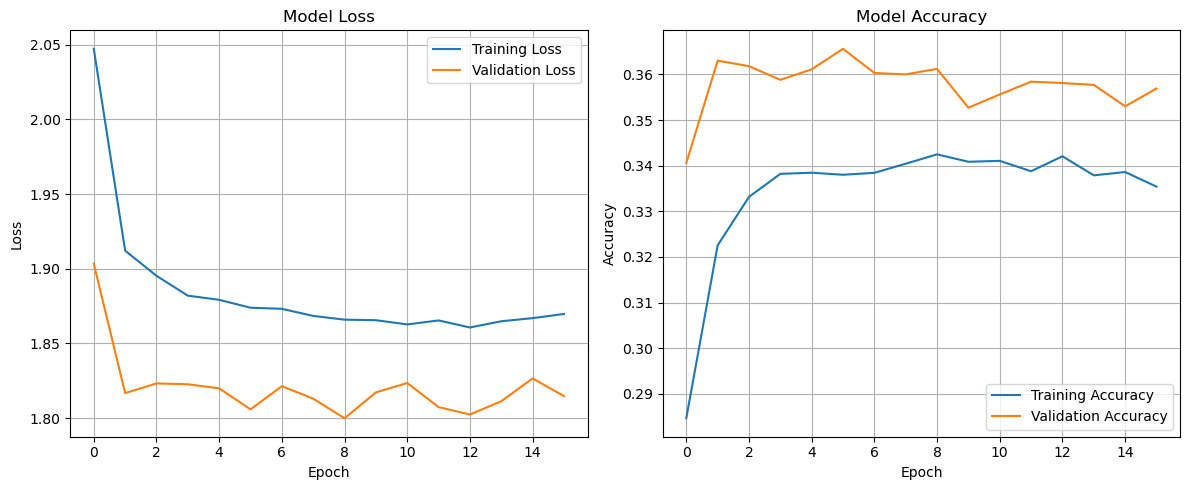

In [34]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 학습 히스토리 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss 시각화
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Accuracy 시각화
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [35]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.8059 - accuracy: 0.3656


[1.8058677911758423, 0.36559998989105225]